# Proyecto Final

Los datos en credit_data.xlsx contienen las siguientes columnas:

* 'Age':  Edad del cliente.
* 'Sex':  Sexo de las personas, puede ser male o female.
* 'Job':  Cantidad del empleo (0 a 3).
* 'Housing':  Tipo de vivienda (own, free, rent).
* 'Saving accounts':  Estado de cuentas de ahorro (little, moderate, quite rich, rich).
* 'Checking account':  Estado de cuentas corrientes (little, moderate, rich).
* 'Credit amount':  Monto del crédito.
* 'Duration':  Duración del crédito en meses.
* 'Purpose':  Propósito del crédito (radio/TV, education, furniture/equipment, entre otros).
* 'Risk':  Clasificación de riesgo, puede ser good o bad.


### Importar librerías

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### Leer el dataset

In [2]:
df = pd.read_excel('credit_data.xlsx')

In [3]:
df.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad


# Análisis exploratorio de datos

¡Comenzaremos revisando los datos faltantes y visualizando las relaciones entre las variables con diferentes gráficas!

### Datos faltantes

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   817 non-null    object
 5   Checking account  606 non-null    object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
 9   Risk              1000 non-null   object
dtypes: int64(4), object(6)
memory usage: 78.3+ KB


In [5]:
df.isnull().sum()

Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
Risk                  0
dtype: int64

In [6]:
print(df["Saving accounts"].isnull().sum()/len(df))
print(df["Checking account"].isnull().sum()/len(df))

0.183
0.394


<Axes: >

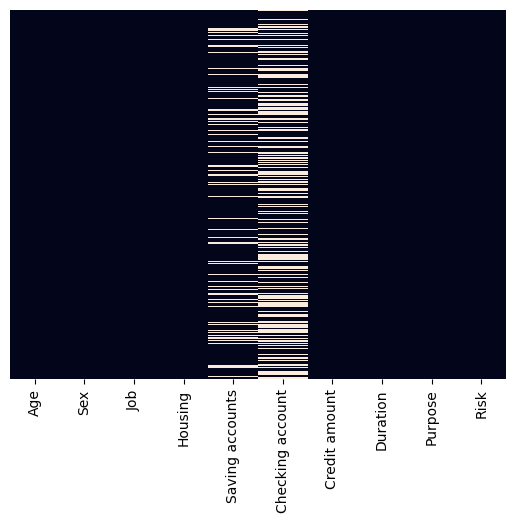

In [7]:
sns.heatmap(df.isnull(), cbar=False, yticklabels=False)

La proporción de Saving accounts que falta es de un 18%, siendo probablemente lo suficientemente pequeña como para reemplazarla razonablemente con alguna forma de imputación. En cuanto a la columna Checking account falta aproximadamente un 40% de los datos, esta es una cantidad significativa y puede afectar las prediciones del modelo.

¡Continuemos visualizando algunos datos más!

Text(0.5, 1.0, 'Savings accounts, moda categórica')

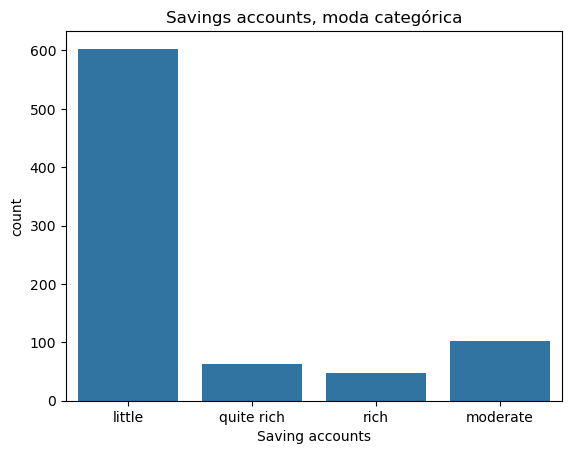

In [8]:
sns.countplot(data=df, x="Saving accounts")
plt.title('Savings accounts, moda categórica')

In [9]:
# Rellenar valores nulos en la columna Saving accounts con la moda categorica.
df["Saving accounts"] = df["Saving accounts"].fillna("little")

In [10]:
# Eliminar la columna Checking account.
df = df.drop(columns = ['Checking account'], axis=1)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Age              1000 non-null   int64 
 1   Sex              1000 non-null   object
 2   Job              1000 non-null   int64 
 3   Housing          1000 non-null   object
 4   Saving accounts  1000 non-null   object
 5   Credit amount    1000 non-null   int64 
 6   Duration         1000 non-null   int64 
 7   Purpose          1000 non-null   object
 8   Risk             1000 non-null   object
dtypes: int64(4), object(5)
memory usage: 70.4+ KB


In [12]:
df.reset_index(drop=True, inplace=True)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Age              1000 non-null   int64 
 1   Sex              1000 non-null   object
 2   Job              1000 non-null   int64 
 3   Housing          1000 non-null   object
 4   Saving accounts  1000 non-null   object
 5   Credit amount    1000 non-null   int64 
 6   Duration         1000 non-null   int64 
 7   Purpose          1000 non-null   object
 8   Risk             1000 non-null   object
dtypes: int64(4), object(5)
memory usage: 70.4+ KB


Text(0.5, 1.0, 'Recuento de Riesgo')

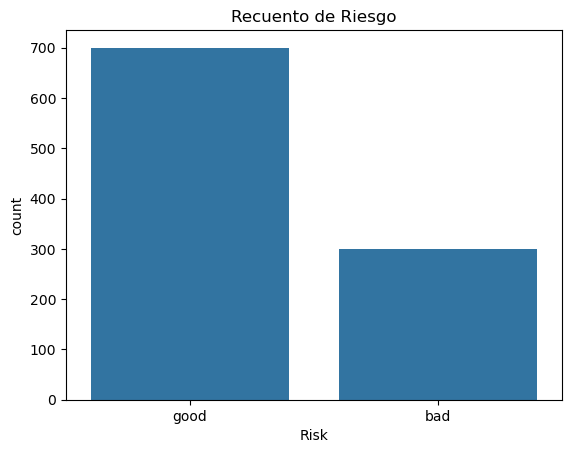

In [14]:
sns.countplot(x='Risk', data = df)
plt.title('Recuento de Riesgo')

In [15]:
df["Risk"].value_counts()

Risk
good    700
bad     300
Name: count, dtype: int64

In [16]:
df["Risk"].value_counts(normalize=True)

Risk
good    0.7
bad     0.3
Name: proportion, dtype: float64

### Análisis visual de las variables y su relación con la variable 'Risk'

Text(0.5, 1.0, 'Riesgo por Sexo')

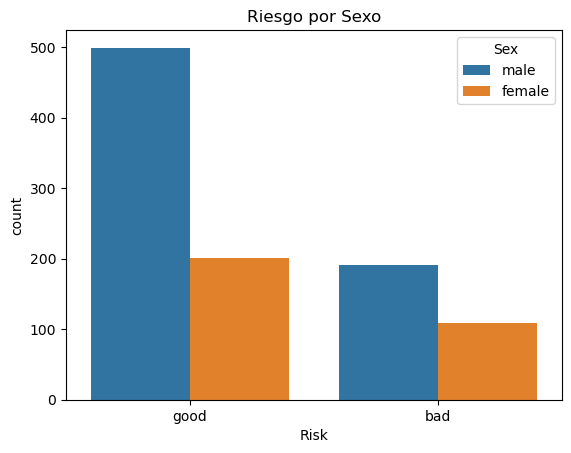

In [17]:
sns.countplot(x='Risk', hue='Sex', data=df)
plt.title('Riesgo por Sexo')

Text(0.5, 1.0, 'Diagrama de caja del Riesgo por Edad')

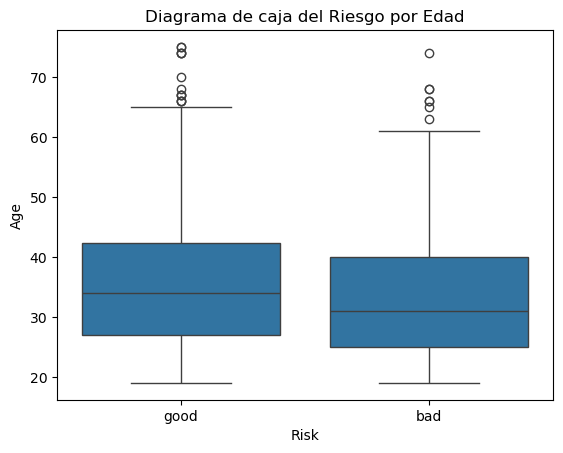

In [18]:
sns.boxplot(x='Risk', y='Age', data=df)
plt.title('Diagrama de caja del Riesgo por Edad')

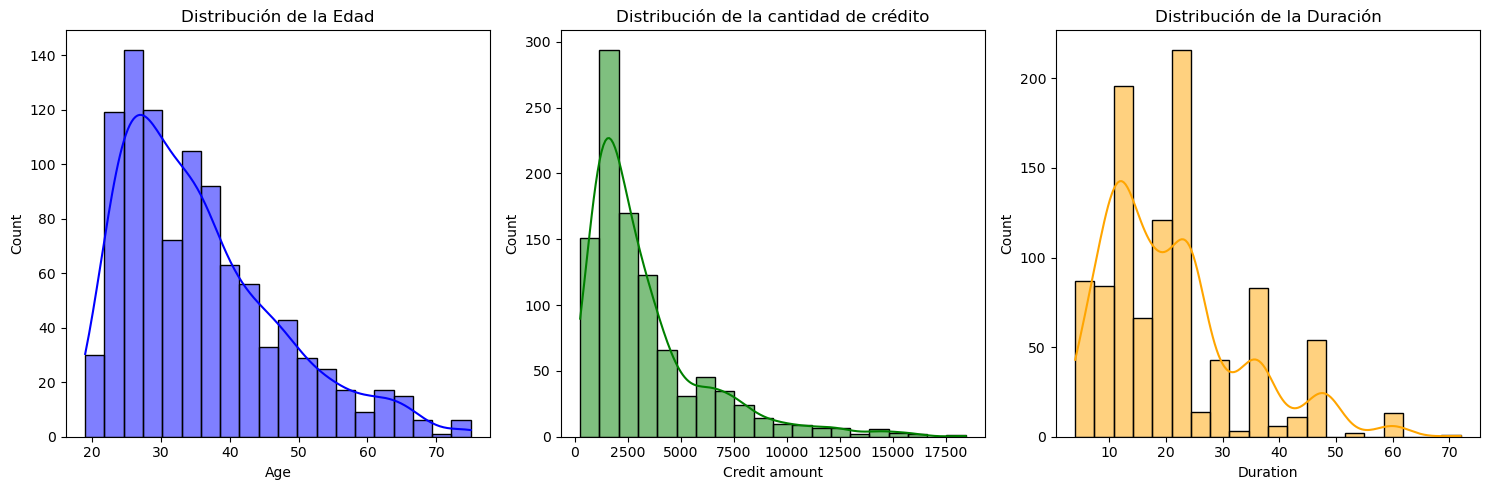

In [19]:
#Visualizar la distribución de 'Age', 'Credit amount', y 'Duration'.
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.histplot(data =df, x='Age', kde=True, bins=20, color='blue')
plt.title('Distribución de la Edad')

plt.subplot(1, 3, 2)
sns.histplot(data =df, x='Credit amount', kde=True, bins=20, color='green')
plt.title('Distribución de la cantidad de crédito')

plt.subplot(1, 3, 3)
sns.histplot(data =df, x='Duration', kde=True, bins=20, color='orange')
plt.title('Distribución de la Duración')

plt.tight_layout()
plt.show()

### Conclusiones del Análisis Exploratorio de Datos: 

**- Relaciónes con la variable "Risk":**

* **El Riesgo por Sexo** muestra que hay más hombres que mujeres en ambos casos, "good" y "bad". Además, observamos el evidente desbalance de los datos.

* **El Riesgo por Edad** es prácticamente igual, por lo tanto no nos brinda mucha información relevante con respeto al riesgo.
  
**- Distribuciones:**

Observe que las variables "Age", "Credit amount", y "Duration" poseen distribuciones muy similares: 

* La variable **Age** muestra una mayor cantidad de clientes en el rango de 20 a 40 años, con una tendencia descendiende a las edades mayores.

* La variable **Credit amount** muesta una distribución descendiente de izquierda a derecha, indicando que la mayor parte de los créditos son de menor cantidad. No obstante, hay algunos créditos significativamente más grandes. 

* La variable **Duration** muestra mayor frecuencia en los créditos de menor duración y va disminuyendo a medida que la duración aumenta.

## División de prueba de entrenamiento

In [20]:
X = df.drop(['Risk'],axis=1)
y = df['Risk']

## Preprocesamiento de datos

In [21]:
from src.preprocessing import preprocessing

In [22]:
X_train, X_test, y_train, y_test, col_transformer, scaler, ohe, cat_cols, num_cols, X_id = preprocessing(X=X, 
                                                                                                         y=y,
                                                                                                         identifier=None,
                                                                                                         scaler=False, 
                                                                                                         winsorize=False)

Fecha y hora de inicio: 2024-09-06 11:52:19
--------------------------------------------------
Valores Nulos
--------------------------------------------------
Age                0
Sex                0
Job                0
Housing            0
Saving accounts    0
Credit amount      0
Duration           0
Purpose            0
dtype: int64
--------------------------------------------------
Fecha y hora de finalización: 2024-09-06 11:52:19
Tiempo transcurrido: 0 horas, 0 minutos y 0 segundos
--------------------------------------------------


In [23]:
X_train.head()

,Sex_female,Sex_male,Housing_free,Housing_own,Housing_rent,Saving accounts_little,Saving accounts_moderate,Saving accounts_quite rich,Saving accounts_rich,Purpose_business,...,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others,Age,Job,Credit amount,Duration
328,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,31.0,2.0,4473.0,36.0
891,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,46.0,2.0,1829.0,15.0
255,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,27.0,1.0,7418.0,60.0
243,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,27.0,2.0,1185.0,12.0
492,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,27.0,2.0,1237.0,6.0


In [24]:
y_train.head()

328    good
891    good
255    good
243    good
492    good
Name: Risk, dtype: object

In [25]:
X_test.head()

,Sex_female,Sex_male,Housing_free,Housing_own,Housing_rent,Saving accounts_little,Saving accounts_moderate,Saving accounts_quite rich,Saving accounts_rich,Purpose_business,...,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others,Age,Job,Credit amount,Duration
80,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,44.0,2.0,5943.0,24.0
157,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,45.0,1.0,339.0,12.0
65,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,48.0,2.0,5190.0,27.0
489,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,26.0,2.0,3518.0,6.0
804,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,24.0,0.0,7472.0,12.0


## Modelamiento

¡Continuaremos con la construcción de nuestros modelos!

## Modelo de Regresión Logística

In [26]:
from sklearn.linear_model import LogisticRegression

In [27]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression()

In [28]:
predictions = logmodel.predict(X_test)

In [29]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, confusion_matrix

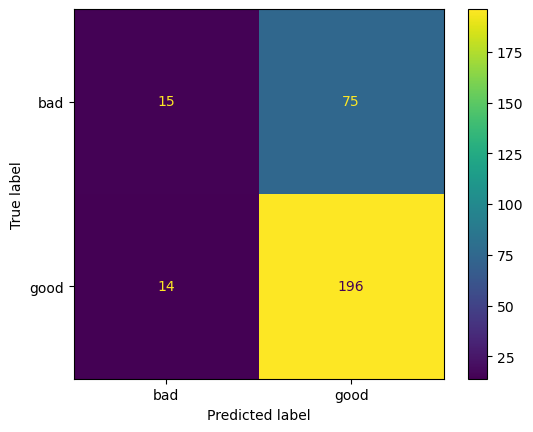

In [30]:
cm = confusion_matrix(y_test, predictions, labels=logmodel.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=logmodel.classes_)
disp.plot()
plt.show()

In [31]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

         bad       0.52      0.17      0.25        90
        good       0.72      0.93      0.81       210

    accuracy                           0.70       300
   macro avg       0.62      0.55      0.53       300
weighted avg       0.66      0.70      0.65       300



### Observación:

Observamos que el accuracy es de 0.7; sin embargo, el recall de 'bad' en la variable 'Risk' es de un 0.17, siendo una cantidad muy baja. Por otra parte, el recall de 'good' es muy bueno, y esto es debido a un evidente desbalance de los datos. 

Continuaremos con SMOTE para balancear los datos y ver si el modelo muestra mejoras, especialmente en el recall, debido a que nos interesa que nuestro modelo nos recupere con mayor efectividad los riesgos negativos.

In [32]:
from imblearn.over_sampling import SMOTE
sm = SMOTE()

sm_X_train, sm_y_train = sm.fit_resample(X_train, y_train)

In [33]:
y_train.value_counts()

Risk
good    490
bad     210
Name: count, dtype: int64

In [34]:
#Datos balanceados
sm_y_train.value_counts()

Risk
good    490
bad     490
Name: count, dtype: int64

In [35]:
logmodel_sm = LogisticRegression()
logmodel_sm.fit(sm_X_train, sm_y_train)
pred_logmodel_sm = logmodel_sm.predict(X_test)

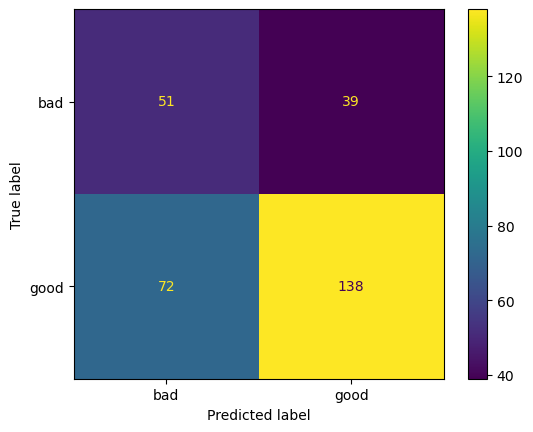

In [36]:
cm = confusion_matrix(y_test, pred_logmodel_sm, labels=logmodel_sm.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=logmodel_sm.classes_)
disp.plot()
plt.show()

In [37]:
print("Regresion Normal")
print(classification_report(y_test,predictions))

print("Regresion SMOTE")
print(classification_report(y_test, pred_logmodel_sm))

Regresion Normal
              precision    recall  f1-score   support

         bad       0.52      0.17      0.25        90
        good       0.72      0.93      0.81       210

    accuracy                           0.70       300
   macro avg       0.62      0.55      0.53       300
weighted avg       0.66      0.70      0.65       300

Regresion SMOTE
              precision    recall  f1-score   support

         bad       0.41      0.57      0.48        90
        good       0.78      0.66      0.71       210

    accuracy                           0.63       300
   macro avg       0.60      0.61      0.60       300
weighted avg       0.67      0.63      0.64       300



### Conclusiones del Modelo de Rergresión Logistica después de aplicar SMOTE:
Observe que luego de balancear los datos con SMOTE, si comparamos ambos reportes de clasificación el **accuracy** bajó de 0.70 a 0.63. Sin embargo, el modelo mostró mejoras muy significativas en el **recall** de "bad", pasando de 0.17 a 0.57. Además, tanto la **precision** como el **f1-score** muestran resultados más balanceados. 

Por lo tanto, note que estas predicciones son más coherentes con respeto a nuestros datos.

## Modelo de Regresión Lineal

In [38]:
df.describe()

,Age,Job,Credit amount,Duration
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,35.546000,1.904000,3271.258000,20.903000
std,11.375469,0.653614,2822.736876,12.058814
min,19.000000,0.000000,250.000000,4.000000
25%,27.000000,2.000000,1365.500000,12.000000
50%,33.000000,2.000000,2319.500000,18.000000
75%,42.000000,2.000000,3972.250000,24.000000
max,75.000000,3.000000,18424.000000,72.000000


In [39]:
df.corr(numeric_only=True)

,Age,Job,Credit amount,Duration
Age,1.000000,0.015673,0.032716,-0.036136
Job,0.015673,1.000000,0.285385,0.210910
Credit amount,0.032716,0.285385,1.000000,0.624984
Duration,-0.036136,0.210910,0.624984,1.000000


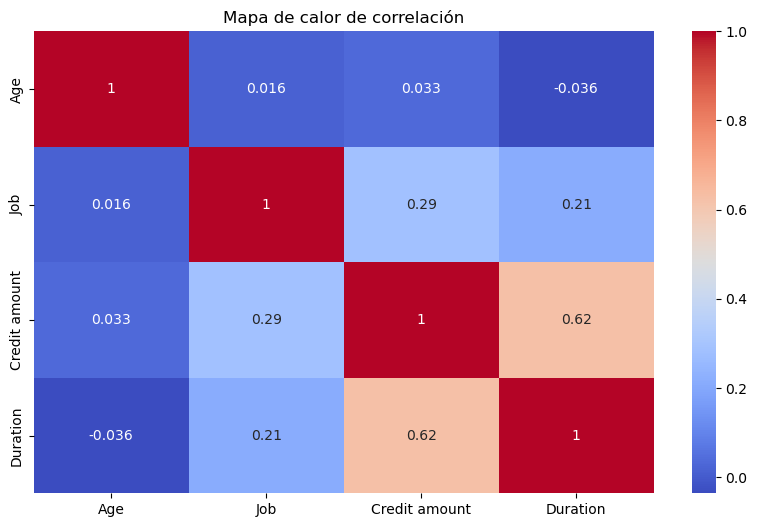

In [40]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Mapa de calor de correlación')
plt.show()

### Observación del mapa de calor de correlación:

Note que la variable "Duration" tiene una fuerte relación con nuestra variable objetivo "Credit amount" en comparación con las demás. Esto es debido a que los créditos de mayor cantidad suelen tener mayor duración.

Por otra parte, la variables predictoras muestran una corelación baja entre ellas; por lo tanto no tenemos que preocuparnos por multicolinealidad.

## División de prueba de entrenamiento

In [41]:
df.columns

Index(['Age', 'Sex', 'Job', 'Housing', 'Saving accounts', 'Credit amount',
       'Duration', 'Purpose', 'Risk'],
      dtype='object')

In [42]:
X = df.drop(columns= ['Sex', 'Housing', 'Saving accounts', 'Credit amount', 'Purpose', 'Risk'])
y = df['Credit amount']

## Preprocesamiento de datos

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [45]:
X_train.head()

,Age,Job,Duration
541,60,2,24
440,39,3,12
482,57,2,30
422,47,1,12
778,38,3,36


In [46]:
y_train.head()

541    2032
440    1884
482    3622
422     958
778    5711
Name: Credit amount, dtype: int64

In [47]:
X_test.head()

,Age,Job,Duration
521,24,2,18
737,35,1,18
740,32,2,24
660,23,2,12
411,35,3,33


### Creando y Entrenando el Modelo

In [48]:
from sklearn.linear_model import LinearRegression

In [49]:
# instanciando algoritmo.
lm = LinearRegression()

In [50]:
# entrenando modelo.
lm.fit(X_train, y_train)

LinearRegression()

### Predicciones de nuestro modelo

¡Tomemos predicciones de nuestro conjunto de prueba y veamos qué tan bien lo hizo!

In [51]:
predicciones= lm.predict(X_test)

Text(0.5, 1.0, 'Diagrama de dispersión')

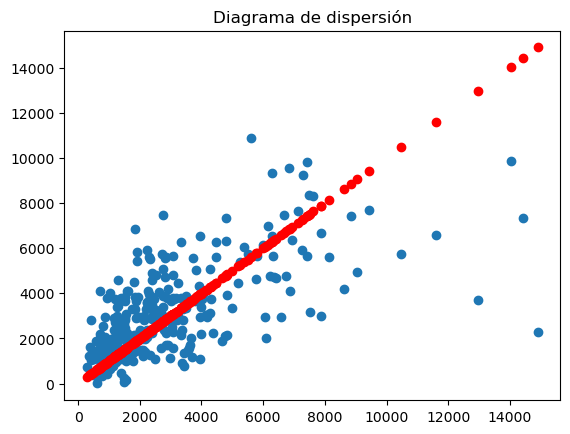

In [52]:
plt.scatter(y_test, predicciones)
plt.scatter(y_test, y_test, color = 'r')
plt.title('Diagrama de dispersión')

<Axes: xlabel='Credit amount', ylabel='Count'>

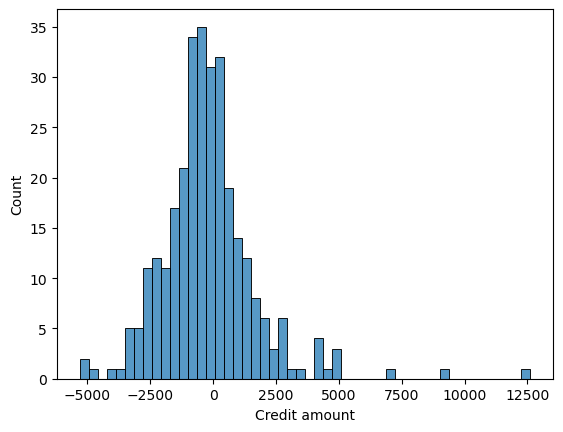

In [53]:
sns.histplot(y_test - predicciones, bins=50)

In [54]:
from sklearn.metrics import r2_score

r2_score(y_test, predicciones)

0.36107239907278876

### Conclusiones del Modelo de Regresión Lineal:

El modelo de regresión lineal obtuvo un valor de **r2_score** de 36.1% de la variabilidad en el Credit amount. Este valor puede ser considerado aceptable, especialmente considerando el desbalance que tenemos en los datos.

De hecho, este puede ser el indicativo de que hay factores importantes que no están siendo capturados debido al ruido en los datos. ​

## Modelo de segmentación KMeans 

In [55]:
df.columns

Index(['Age', 'Sex', 'Job', 'Housing', 'Saving accounts', 'Credit amount',
       'Duration', 'Purpose', 'Risk'],
      dtype='object')

In [56]:
df = df.drop(columns = ['Sex', 'Job', 'Housing', 'Saving accounts', 'Purpose', 'Risk'])

### Seleccionando los K grupos más optimos

In [57]:
#normalizando variables.
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler, StandardScaler

scaler = MinMaxScaler()

df_scaled = scaler.fit_transform(df)

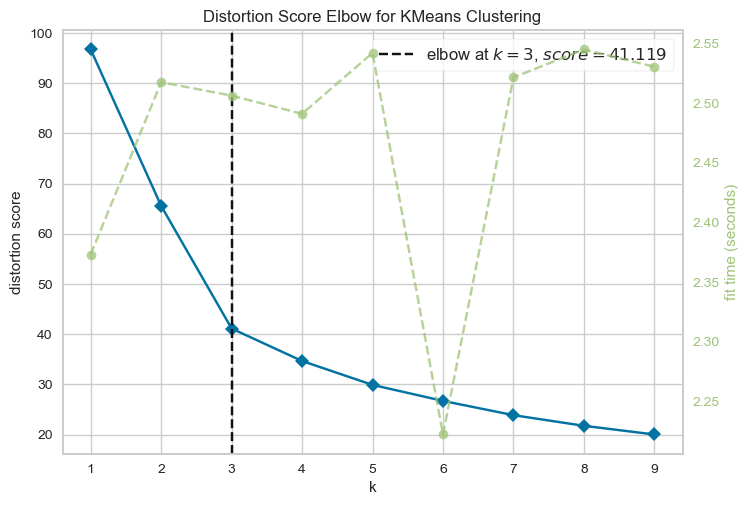

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [58]:
from yellowbrick.cluster import KElbowVisualizer

# Crear una instancia del visualizador y modelo de agrupación en clústeres.
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,10))

visualizer.fit(df_scaled)
visualizer.show()

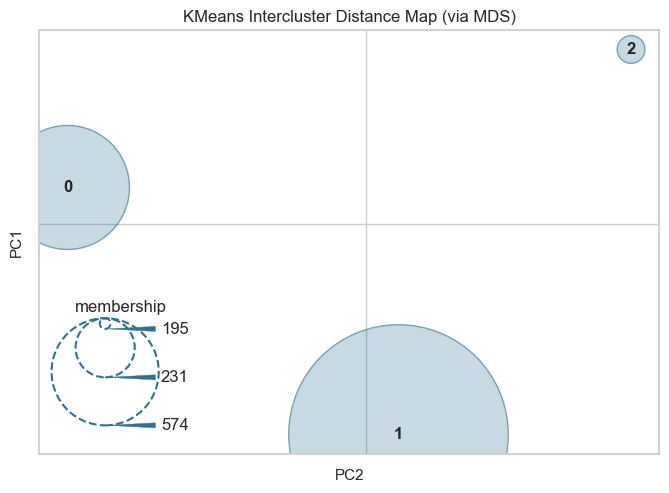

<Axes: title={'center': 'KMeans Intercluster Distance Map (via MDS)'}, xlabel='PC2', ylabel='PC1'>

In [59]:
from yellowbrick.cluster import InterclusterDistance

# Crear una instancia del visualizador y modelo de agrupación en clústeres.
model = KMeans(3)
visualizer = InterclusterDistance(model)

visualizer.fit(df_scaled)
visualizer.show()

In [60]:
model = KMeans(n_clusters=3)
model.fit(df_scaled)

KMeans(n_clusters=3)

In [61]:
df['Cluster'] = pd.Series(model.labels_)

In [62]:
df.head()

,Age,Credit amount,Duration,Cluster
0,67,1169,6,2
1,22,5951,48,0
2,49,2096,12,2
3,45,7882,42,0
4,53,4870,24,2


In [63]:
from sklearn.metrics import silhouette_score

X = df_scaled
y = model.labels_
silhouette_score(X,y,metric = 'euclidean')

0.4082289981522351

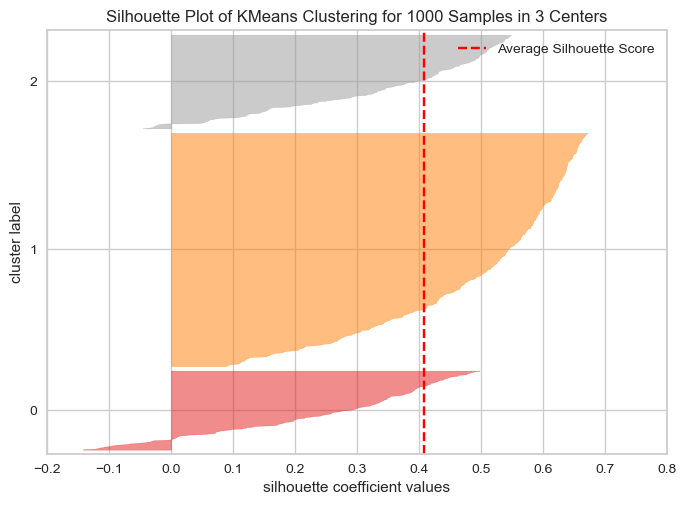

In [64]:
from yellowbrick.cluster import SilhouetteVisualizer

visualizer = SilhouetteVisualizer(model)

visualizer.fit(df_scaled)       
visualizer.show()
plt.show()

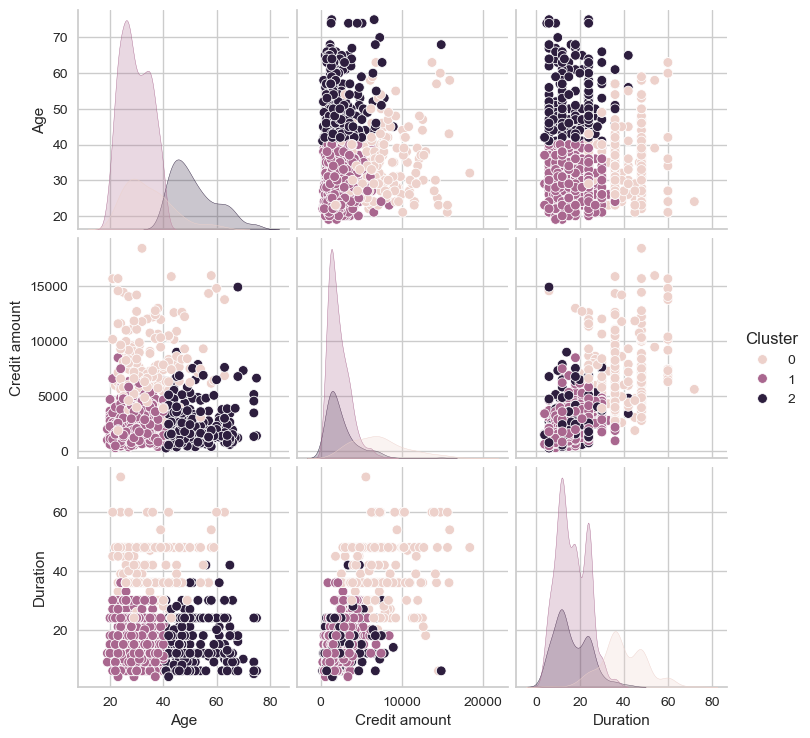

In [65]:
sns.pairplot(df, hue= 'Cluster')

### Conclusiones del Modelo de Segmentación:

**Método del Codo:**

El gráfico indica que el número adecuado de clusters es 3, puesto que a partir de ese punto la inercia desciende bruscamente.

**Coeficiente de Silueta:**

El valor del coeficiente de silueta es aproximadamente 40%, esto significa que los clusters se encuentran bien definidos.